In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.shape

(4424, 37)

In [5]:
# Check the proportion of each target in the population
df['Target'].value_counts()/df.shape[0]

Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: Target, dtype: float64

In [6]:
# columns referred as likely to affect results in the EDA part and we only keep those part for modelling
likely_cls = ['Marital status','Application mode','Course','Previous qualification','Nacionality',
              "Father's qualification", "Mother's occupation","Father's occupation",
              'Debtor','Tuition fees up to date','Scholarship holder','Curricular units 1st sem (enrolled)',
              'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
              'Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)',
              'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
              'Curricular units 2nd sem (approved)','Curricular units 2nd sem (without evaluations)',
             'Target']
#course: categorical

In [7]:
df_cleaned = df[likely_cls]
df_cleaned.head()

,Marital status,Application mode,Course,Previous qualification,Nacionality,Father's qualification,Mother's occupation,Father's occupation,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Target
0,1,17,171,1,1,12,5,9,0,1,...,0,0,0,0,0,0,0,0,0,Dropout
1,1,15,9254,1,1,3,3,3,0,0,...,6,6,6,0,0,6,6,6,0,Graduate
2,1,1,9070,1,1,37,9,9,0,0,...,6,0,0,0,0,6,0,0,0,Dropout
3,1,17,9773,1,1,37,5,3,0,1,...,6,8,6,0,0,6,10,5,0,Graduate
4,2,39,8014,1,1,38,9,9,0,1,...,6,9,5,0,0,6,6,6,0,Graduate


In [8]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('Target', axis = 1), 
                                                    df_cleaned['Target'], test_size=0.2, 
                                                    random_state=42)

### Decision Tree

In [9]:
df_cleaned

,Marital status,Application mode,Course,Previous qualification,Nacionality,Father's qualification,Mother's occupation,Father's occupation,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Target
0,1,17,171,1,1,12,5,9,0,1,...,0,0,0,0,0,0,0,0,0,Dropout
1,1,15,9254,1,1,3,3,3,0,0,...,6,6,6,0,0,6,6,6,0,Graduate
2,1,1,9070,1,1,37,9,9,0,0,...,6,0,0,0,0,6,0,0,0,Dropout
3,1,17,9773,1,1,37,5,3,0,1,...,6,8,6,0,0,6,10,5,0,Graduate
4,2,39,8014,1,1,38,9,9,0,1,...,6,9,5,0,0,6,6,6,0,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,9773,1,1,1,5,4,0,1,...,6,7,5,0,0,6,8,5,0,Graduate
4420,1,1,9773,1,105,1,9,9,1,0,...,6,6,6,0,0,6,6,2,0,Dropout
4421,1,1,9500,1,1,37,9,9,0,1,...,7,8,7,0,0,8,9,1,0,Dropout
4422,1,1,9147,1,1,37,7,4,0,1,...,5,5,5,0,0,5,6,5,0,Graduate


In [66]:
preproc = ColumnTransformer(transformers =
    [
     ("one",OneHotEncoder(handle_unknown = 'ignore'),["Nacionality",'Course','Marital status',
                                                      'Application mode',"Father's occupation",
                                                     "Mother's occupation"])
    ],
    remainder = 'passthrough')

base = Pipeline([('preprocessor', preproc),
                 ('r', DecisionTreeClassifier(max_depth = 6,
                        criterion = "gini", min_samples_split = 100))])
base.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nacionality', 'Course',
                                                   'Marital status',
                                                   'Application mode',
                                                   "Father's occupation",
                                                   "Mother's occupation"])])),
                ('r',
                 DecisionTreeClassifier(max_depth=6, min_samples_split=100))])

In [67]:
base.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nacionality', 'Course',
                                                   'Marital status',
                                                   'Application mode',
                                                   "Father's occupation",
                                                   "Mother's occupation"])])),
                ('r',
                 DecisionTreeClassifier(max_depth=6, min_samples_split=100))])

In [80]:
predictions_dt = base.predict(X_test)
accuracy = accuracy_score(y_test, predictions_dt)
print("Accuracy:", accuracy)

Accuracy: 0.7367231638418079


In [68]:
error={}
error["train"] = f1_score(y_train, base.predict(X_train), average='macro')
error["test"] = f1_score(y_test, base.predict(X_test), average='macro')
error

{'train': 0.6956620305339202, 'test': 0.6437335788763421}

In [70]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {
    'max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, None], 
    'min_samples_split': [2, 5, 10, 20, 50, 100, 200],
    'criterion': ['gini', 'entropy']
}
X_train_m = preproc.transform(X_train)
searcher = GridSearchCV(DecisionTreeClassifier(), hyperparameters, cv=5)
searcher.fit(X_train_m, y_train)
searcher.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 100}

In [72]:
final = Pipeline([('preprocessor', preproc),
                  ('r', DecisionTreeClassifier(**searcher.best_params_))])
final.fit(X_train,y_train)
error={}
error["train"] = f1_score(y_train, final.predict(X_train), average='macro')
error["test"] = f1_score(y_test, final.predict(X_test), average='macro')
error

{'train': 0.7215309424304435, 'test': 0.6483387851870842}

/Users/ruijiezhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


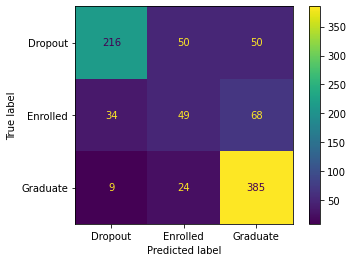

In [73]:
from sklearn import metrics
metrics.plot_confusion_matrix(final, X_test, y_test)

### Logistic Regression

In [76]:
base_logistic = Pipeline([('preprocessor', preproc),
                 ('r', LogisticRegression())])

In [77]:
base_logistic.fit(X_train,y_train)

/Users/ruijiezhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nacionality', 'Course',
                                                   'Marital status',
                                                   'Application mode',
                                                   "Father's occupation",
                                                   "Mother's occupation"])])),
                ('r', LogisticRegression())])

In [78]:
base_logistic.fit(X_train,y_train)

/Users/ruijiezhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nacionality', 'Course',
                                                   'Marital status',
                                                   'Application mode',
                                                   "Father's occupation",
                                                   "Mother's occupation"])])),
                ('r', LogisticRegression())])

In [79]:
predictions_l = base_logistic.predict(X_test)
accuracy = accuracy_score(y_test, predictions_l)
print("Accuracy:", accuracy)

Accuracy: 0.7536723163841808
